In [1]:
import numpy as np
import pandas as pd
from sodapy import Socrata

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

In [2]:
df = pd.read_pickle('Data/ML_2015.pkl')

In [3]:
df.dtypes

borough                            object
city                               object
created_date               datetime64[ns]
incident_zip                        int64
latitude                          float64
longitude                         float64
complaint_type                     object
created_date_year                   int64
created_date_month                  int64
created_date_dayofmonth             int64
created_date_dayofweek              int64
created_date_hour                   int64
dtype: object

In [4]:
df = df.drop('created_date', axis=1)
df = df.drop('created_date_year', axis=1)
df = df.drop('city', axis=1)

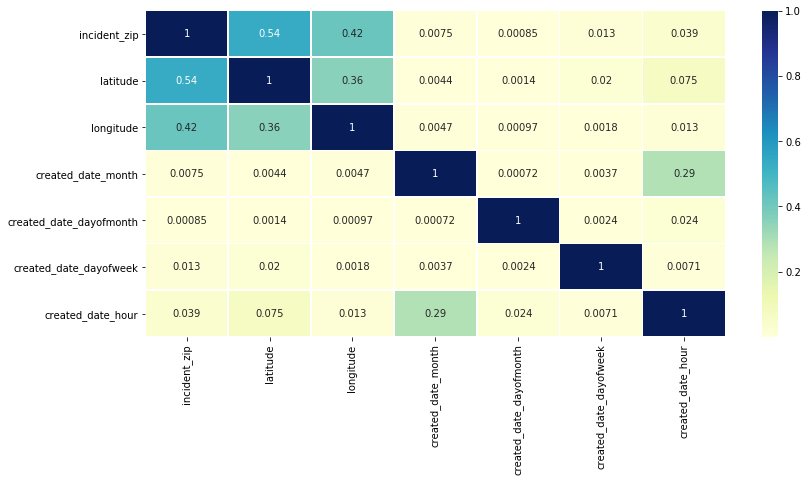

In [5]:
mask = np.zeros_like(abs(df.corr()), dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

plt.figure(figsize=(13, 6))
sns.heatmap(abs(df.corr()), annot=True, linewidths=.5, cmap="YlGnBu")

In [6]:
def feature_importance_data(fited_model):
    feature_importances = pd.Series(fited_model.feature_importances_, index=X.columns)
    print(feature_importances)
    feature_importances.sort_values(inplace=True)
    return feature_importances.plot(kind='barh')

### Training/Test Data Seperation

In [9]:
from sklearn.model_selection import train_test_split

y = df.complaint_type
X = df.drop('complaint_type', axis=1)
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    shuffle=True, random_state=73)

In [10]:
X.dtypes

incident_zip                  int64
latitude                    float64
longitude                   float64
created_date_month            int64
created_date_dayofmonth       int64
created_date_dayofweek        int64
created_date_hour             int64
borough_BRONX                 uint8
borough_BROOKLYN              uint8
borough_MANHATTAN             uint8
borough_QUEENS                uint8
borough_STATEN ISLAND         uint8
city_ARVERNE                  uint8
city_ASTORIA                  uint8
city_BAYSIDE                  uint8
city_BELLEROSE                uint8
city_BREEZY POINT             uint8
city_BRONX                    uint8
city_BROOKLYN                 uint8
city_CAMBRIA HEIGHTS          uint8
city_COLLEGE POINT            uint8
city_CORONA                   uint8
city_EAST ELMHURST            uint8
city_ELMHURST                 uint8
city_FAR ROCKAWAY             uint8
city_FLORAL PARK              uint8
city_FLUSHING                 uint8
city_FOREST HILLS           

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


rf = RandomForestClassifier(n_estimators=500, max_depth=3, max_features=5, n_jobs=-1, random_state=73)
rf.fit(X,y)

scores = cross_val_score(rf,X,y, cv=5)
print(scores)

feature_importance_data(rf)

#### Grid Search

In [ ]:
X.shape

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

parameters = {'max_depth': range(3,20), 'max_features': range(2,7)}
grid_search = GridSearchCV(estimator=rf_clf, param_grid=parameters, cv=10, n_jobs=-1)

grid_search.fit(X, y)

best_parameters=grid_search.best_estimator_.get_params()
best_parameters

In [ ]:
scores = cross_val_score(grid_search,X,y, cv=5)
print(scores)

In [ ]:
grid_search.best_score_

## Logistic Regression